
# ADHD Prediction using Advanced Models (XAI and Hybrid)

In this notebook, we will implement two Explainable AI (XAI) models and two hybrid models to predict ADHD using machine learning. The evaluation metrics used will be accuracy and confusion matrices.

## Steps:
1. Data Loading & Preprocessing
2. Train-Test Split
3. XAI Models:
   - SHAP with XGBoost
   - LIME with Random Forest
4. Hybrid Models:
   - Neural Network + Random Forest
   - Neural Network(MLPClassifier) + Decision Tree
5. Model Evaluation: Accuracy and Confusion Matrix


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install shap
!pip install lime


In [ ]:

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import shap
import lime
import lime.lime_tabular
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read in the ADHD data from each CSV file
df1 = pd.read_csv('/content/drive/MyDrive/ADHD/v1p.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ADHD/v3p.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ADHD/v6p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_ADHD = pd.concat([df1, df2, df3])

# Write the combined DataFrame to a new CSV file
combined_df_ADHD.to_csv('combined_ADHD.csv', index=False)

In [ ]:
# Reading the ADHD data
df_ADHD = pd.read_csv('/content/combined_ADHD.csv')

# # Print the first five row
df_ADHD.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,85,-407,200,191,420,457,310,310,16,1009,531,126,457,200,457,384,-90,473,121
1,1,-266,-55,-20,367,163,384,-20,310,494,1193,494,236,236,310,200,457,-195,543,15
2,2,-90,-19,126,437,420,568,347,457,-131,1156,384,384,494,384,494,531,-19,613,261
3,3,-90,-160,163,473,384,494,310,384,457,1340,494,420,310,420,273,531,-90,437,-19
4,4,-301,-336,-20,473,200,531,89,420,200,1156,310,494,273,457,236,568,-160,578,121


In [ ]:
# Read in the Control data from each CSV file
df4 = pd.read_csv('/content/drive/MyDrive/Control/v41p.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Control/v42p.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Control/v43p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_control = pd.concat([df4, df5, df6])

# Write the combined DataFrame to a new CSV file
combined_df_control.to_csv('combined_Control.csv', index=False)

In [ ]:
# Reading the Control data
df_control = pd.read_csv('/content/combined_Control.csv')

# Print the first five row
df_control.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,367.0,156.0,310.0,156.0,384.0,163.0,420.0,200.0,420.0,273.0,310.0,200.0,384.0,200.0,384.0,163.0,367.0,156.0,508.0
1,1,473.0,85.0,531.0,226.0,494.0,163.0,494.0,52.0,531.0,163.0,604.0,200.0,568.0,236.0,568.0,163.0,508.0,85.0,402.0
2,2,402.0,-19.0,531.0,85.0,457.0,-20.0,420.0,-241.0,347.0,-57.0,457.0,89.0,457.0,126.0,457.0,-57.0,332.0,15.0,226.0
3,3,332.0,50.0,457.0,191.0,384.0,-20.0,273.0,-388.0,310.0,-241.0,494.0,163.0,494.0,163.0,420.0,-131.0,473.0,50.0,15.0
4,4,437.0,121.0,568.0,261.0,494.0,52.0,384.0,-315.0,384.0,-57.0,494.0,126.0,568.0,200.0,568.0,-20.0,402.0,-19.0,85.0


In [ ]:
# Add a new column with a value of 0 in all rows of ADHD Data
df_ADHD['result'] = 0

# Write the updated DataFrame to the same CSV file
df_ADHD.to_csv('/content/combined_ADHD.csv', index=False)

df_ADHD.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,result
0,0,85,-407,200,191,420,457,310,310,16,...,531,126,457,200,457,384,-90,473,121,0
1,1,-266,-55,-20,367,163,384,-20,310,494,...,494,236,236,310,200,457,-195,543,15,0
2,2,-90,-19,126,437,420,568,347,457,-131,...,384,384,494,384,494,531,-19,613,261,0
3,3,-90,-160,163,473,384,494,310,384,457,...,494,420,310,420,273,531,-90,437,-19,0
4,4,-301,-336,-20,473,200,531,89,420,200,...,310,494,273,457,236,568,-160,578,121,0


In [ ]:
# Add a new column with a value of 1 in all rows Control healthy data
df_control['result'] = 1

# Write the updated DataFrame to the same CSV file
df_control.to_csv('combined_Control.csv', index=False)

df_control.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,result
0,0,367.0,156.0,310.0,156.0,384.0,163.0,420.0,200.0,420.0,...,310.0,200.0,384.0,200.0,384.0,163.0,367.0,156.0,508.0,1
1,1,473.0,85.0,531.0,226.0,494.0,163.0,494.0,52.0,531.0,...,604.0,200.0,568.0,236.0,568.0,163.0,508.0,85.0,402.0,1
2,2,402.0,-19.0,531.0,85.0,457.0,-20.0,420.0,-241.0,347.0,...,457.0,89.0,457.0,126.0,457.0,-57.0,332.0,15.0,226.0,1
3,3,332.0,50.0,457.0,191.0,384.0,-20.0,273.0,-388.0,310.0,...,494.0,163.0,494.0,163.0,420.0,-131.0,473.0,50.0,15.0,1
4,4,437.0,121.0,568.0,261.0,494.0,52.0,384.0,-315.0,384.0,...,494.0,126.0,568.0,200.0,568.0,-20.0,402.0,-19.0,85.0,1


In [ ]:
# Read in the data from both ADHD & Control Healthy CSV files
df7 = pd.read_csv('/content/combined_ADHD.csv')
df8 = pd.read_csv('/content/combined_Control.csv')

# Combine the DataFrames into a single DataFrame
combined_df_data = pd.concat([df7, df8])

# Shuffle the rows of the combined DataFrame
combined_df_data = combined_df_data.sample(frac=1, random_state=1234)

# Write the shuffled DataFrame to a new CSV file
combined_df_data.to_csv('combined_data.csv', index=False)

In [ ]:
# Reading the Combine data
df = pd.read_csv('/content/combined_data.csv')

# Print the first ten row
df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,result
0,8059,-160.0,85.0,16.0,226.0,-20.0,347.0,52.0,310.0,89.0,...,-94.0,126.0,-57.0,163.0,-94.0,200.0,121.0,297.0,191.0,1
1,14168,613.0,437.0,163.0,261.0,-131.0,163.0,-167.0,200.0,-57.0,...,457.0,52.0,236.0,236.0,-20.0,347.0,-19.0,156.0,-55.0,0
2,6560,-583.0,437.0,-241.0,-55.0,-20.0,126.0,-278.0,52.0,-94.0,...,52.0,16.0,-57.0,126.0,52.0,126.0,-371.0,226.0,15.0,0
3,15506,85.0,50.0,16.0,-19.0,163.0,16.0,200.0,163.0,163.0,...,52.0,16.0,89.0,-20.0,89.0,89.0,-19.0,191.0,191.0,0
4,15750,367.0,85.0,310.0,-55.0,420.0,-315.0,236.0,-94.0,236.0,...,310.0,-57.0,347.0,-94.0,310.0,-57.0,261.0,-19.0,226.0,1
5,4454,121.0,156.0,89.0,121.0,126.0,-20.0,16.0,-131.0,163.0,...,273.0,494.0,273.0,236.0,163.0,-20.0,261.0,15.0,-19.0,1
6,21191,649.0,649.0,310.0,261.0,89.0,163.0,126.0,52.0,126.0,...,200.0,236.0,163.0,52.0,200.0,126.0,297.0,15.0,50.0,0
7,4031,-55.0,-125.0,16.0,-19.0,126.0,200.0,163.0,-131.0,126.0,...,-94.0,16.0,16.0,52.0,89.0,89.0,-90.0,191.0,85.0,1
8,410,-90.0,85.0,89.0,156.0,89.0,273.0,200.0,384.0,89.0,...,-131.0,310.0,-167.0,126.0,-20.0,236.0,-19.0,297.0,191.0,1
9,7522,-195.0,-19.0,-131.0,-125.0,-94.0,52.0,-131.0,52.0,-20.0,...,-20.0,52.0,-20.0,89.0,16.0,163.0,-125.0,121.0,-90.0,1


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,result
0,-160.0,85.0,16.0,226.0,-20.0,347.0,52.0,310.0,89.0,273.0,-94.0,126.0,-57.0,163.0,-94.0,200.0,121.0,297.0,191.0,1
1,613.0,437.0,163.0,261.0,-131.0,163.0,-167.0,200.0,-57.0,236.0,457.0,52.0,236.0,236.0,-20.0,347.0,-19.0,156.0,-55.0,0
2,-583.0,437.0,-241.0,-55.0,-20.0,126.0,-278.0,52.0,-94.0,457.0,52.0,16.0,-57.0,126.0,52.0,126.0,-371.0,226.0,15.0,0
3,85.0,50.0,16.0,-19.0,163.0,16.0,200.0,163.0,163.0,163.0,52.0,16.0,89.0,-20.0,89.0,89.0,-19.0,191.0,191.0,0
4,367.0,85.0,310.0,-55.0,420.0,-315.0,236.0,-94.0,236.0,-57.0,310.0,-57.0,347.0,-94.0,310.0,-57.0,261.0,-19.0,226.0,1
5,121.0,156.0,89.0,121.0,126.0,-20.0,16.0,-131.0,163.0,-241.0,273.0,494.0,273.0,236.0,163.0,-20.0,261.0,15.0,-19.0,1
6,649.0,649.0,310.0,261.0,89.0,163.0,126.0,52.0,126.0,52.0,200.0,236.0,163.0,52.0,200.0,126.0,297.0,15.0,50.0,0
7,-55.0,-125.0,16.0,-19.0,126.0,200.0,163.0,-131.0,126.0,163.0,-94.0,16.0,16.0,52.0,89.0,89.0,-90.0,191.0,85.0,1
8,-90.0,85.0,89.0,156.0,89.0,273.0,200.0,384.0,89.0,347.0,-131.0,310.0,-167.0,126.0,-20.0,236.0,-19.0,297.0,191.0,1
9,-195.0,-19.0,-131.0,-125.0,-94.0,52.0,-131.0,52.0,-20.0,200.0,-20.0,52.0,-20.0,89.0,16.0,163.0,-125.0,121.0,-90.0,1


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
# x_normalized = x / np.max(x)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18'],
      dtype='object')

In [ ]:
y=pd.DataFrame(y)
y

,result
0,1
1,0
2,0
3,0
4,1
...,...
105338,1
105339,0
105340,0
105341,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model 1: SHAP with XGBoost

XGBoost Accuracy: 0.9269373160775876
Confusion Matrix: 
[[18214   824]
 [ 1485 11080]]


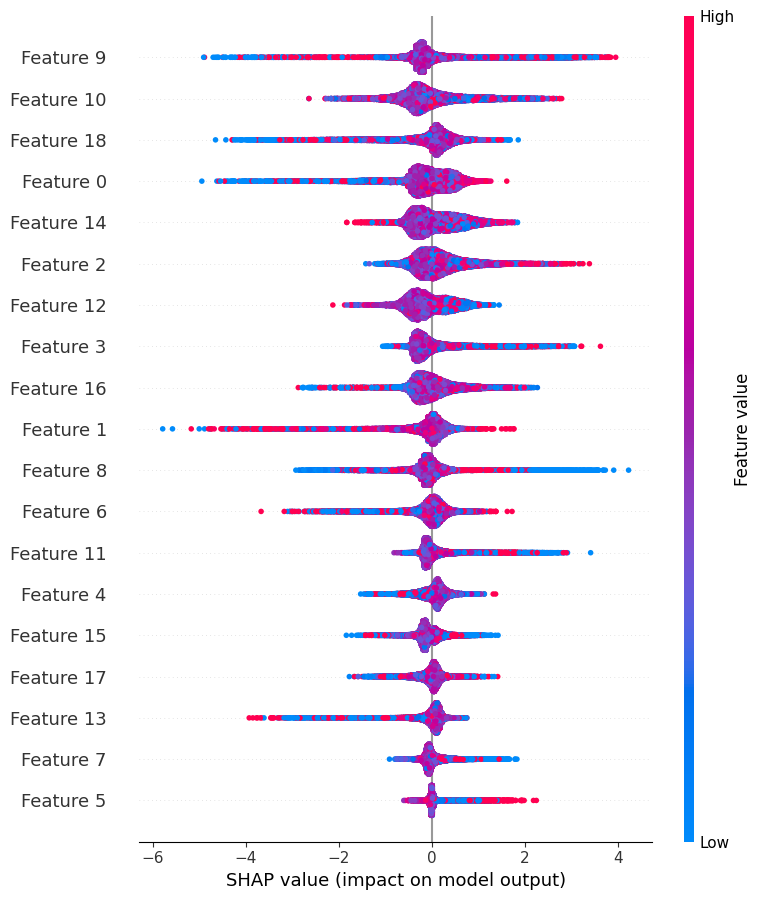

In [ ]:

# Model 1: SHAP with XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"Confusion Matrix: \n{conf_matrix_xgb}")

# SHAP explanations
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)


### Model 2: LIME with Random Forest

In [ ]:
# Model 2: LIME with Random Forest

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # No need to use .ravel() for y_train

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Confusion Matrix: \n{conf_matrix_rf}")

# Convert X_train and X_test back to DataFrames for LIME
X_train_df = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])

# LIME explanations
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_df.values,
    feature_names=X_train_df.columns,
    class_names=['No ADHD', 'ADHD'],
    discretize_continuous=True
)

i = 0  # Example instance to explain
exp = explainer.explain_instance(X_test_df.iloc[i].values, rf_model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9234882764294529
Confusion Matrix: 
[[18405   633]
 [ 1785 10780]]


### Model 3: Neural Network + Random Forest

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Correct y_train and y_test to 1D arrays (if needed)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Define base models (Neural Network)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Define the final estimator (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a stacking classifier with Random Forest as the final estimator
hybrid_model = StackingClassifier(
    estimators=[('mlp', mlp_model)],
    final_estimator=rf_model
)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_hybrid = hybrid_model.predict(X_test)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_hybrid)

print(f"Hybrid Model (NN + RF) Accuracy: {accuracy_hybrid}")
print(f"Confusion Matrix: \n{conf_matrix_hybrid}")


Hybrid Model (NN + RF) Accuracy: 0.9339619656361737
Confusion Matrix: 
[[18122   916]
 [ 1171 11394]]


### Model 4: Neural Network(MLPClassifier) + Decision Tree

In [ ]:

# Model 4: Neural Network + Decision Tree
nn_model = MLPClassifier(hidden_layer_sizes=(100,))
nn_model.fit(X_train, y_train)

# Combine with a Decision Tree
hybrid_model = StackingClassifier(estimators=[('nn', nn_model)], final_estimator=DecisionTreeClassifier())
hybrid_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_hybrid = hybrid_model.predict(X_test)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_hybrid)

print(f"Hybrid Model (NN + DT) Accuracy: {accuracy_hybrid}")
print(f"Confusion Matrix: \n{conf_matrix_hybrid}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Hybrid Model (NN + DT) Accuracy: 0.9355124513495554
Confusion Matrix: 
[[18122   916]
 [ 1122 11443]]



## Conclusion

We have successfully implemented two XAI models (SHAP with XGBoost and LIME with Random Forest) and two hybrid models (Neural Network + Random Forest and Neural Network(MLPClassifier) + Decision Tree). Each model has been evaluated using accuracy and confusion matrices.

The SHAP and LIME models provided insights into feature importance, while the hybrid models aimed to improve classification performance.
